# Valores críticos em uma distribuição *t*

**(a)** Encontre o valor crítico $t_0$ para um teste unilateral à esquerda com
$\alpha = 0,05$ e $n = 21$.

**(b)** Encontre o valor crítico $t_0$ para um teste unilateral à direita com
$\alpha = 0,01$ e $n = 17$.

**(c)** Encontre os valores críticos $–t_0$ e $t_0$ para um teste bilateral com
$\alpha = 0,10$ e $n = 26$.

In [13]:
import scipy.stats as st
# Item (a)
alpha, n = 0.05, 21
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(alpha)
print(f'Teste unilateral à esquerda com alpha = {alpha*100}% - Valor crítico = {t0:.5f}')
# Item (b)
alpha, n = 0.01, 17
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(1-alpha)
print(f'Teste unilateral à direita com alpha = {alpha*100}% - Valor crítico = {t0:.5f}')
# Item (c)
alpha, n = 0.10, 26
dist_t = st.t(df=n-1)
t0 = dist_t.ppf(alpha/2)
print(f'Teste bilateral com alpha = {alpha*100}% - Valores críticos = {t0:.5f} e {-t0:.5f}')

Teste unilateral à esquerda com alpha = 5.0% - Valor crítico = -1.72472
Teste unilateral à direita com alpha = 1.0% - Valor crítico = 2.58349
Teste bilateral com alpha = 10.0% - Valores críticos = -1.70814 e 1.70814


# Função *teste_t* para o teste de hipótese da média

A função *teste_t* decide sobre a validade da hipótese nula ao comparar o p-valor da estatística de teste padronizada com o nível de significância do teste.

In [22]:
def teste_t(est_amostral=None, n_amostras=None, alpha=0.05,
            mu=0, s_amostral=1, teste='esq'):
  '''Função para teste de hipótese da média mu, com nível de significância
     alpha, supondo desvio padrão populacional sigma desconhecido. Forneça a
     média amostral est_amostral, calculada a partir de n_amostras amostras,
     o desvio padrão populaciona s_amostral e informe o tipo de teste:
     unilateral à esquerda ('esq'), unilateral à direita ('dir') ou
     bilateral ('bilateral').'''
  # Criação da distribuição t
  dist_t = st.t(df=n_amostras-1)
  # Cálculo da estatística de teste padronizada
  t = (est_amostral-mu)/(s_amostral/n_amostras**0.5)
  # Hipótese nula inicialmente validade
  rejeicao = False
  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esq':
    t0 = dist_t.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if t <= t0:
      rejeicao = True
  elif teste == 'dir':
    t0 = dist_t.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if t >= t0:
      rejeicao = True
  elif teste == 'bilateral':
    t0 = dist_t.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (t <= t0) or (t >= -t0):
      rejeicao = True
  # Saída - Conclusão do teste
  print('*** Teste de hipótese para a média (sigma desconhecido) ***')
  print(f'Teste {tipo} com t0 = {t0:.6f}')
  if rejeicao:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return t0

# Exercício 01 - Teste unilateral à esquerda

Um vendedor de carros usados diz que o preço médio do sedan de dois anos (em boas condições) é de pelo menos US$\$$ 20.500. Você suspeita que essa afirmação é incorreta e descobre que uma amostra aleatória de 14 veículos similares tem um preço médio de US$\$$ 19.850 e desvio padrão de US$\$$ 1.084.

Há evidência suficiente para rejeitar a afirmação do vendedor para o nível de significância a = 0,05? Suponha que a população é normalmente distribuída (Adaptado de: *Kelley Blue Book*).

In [15]:
# H0: mu >= 20500 (afirmação)
# Ha: mu < 20500
t0 = teste_t(est_amostral=19850, n_amostras=14, alpha=0.05, mu=20500,
             s_amostral=1084, teste='esq')

*** Teste de hipótese para a média (sigma desconhecido) ***
Teste unilateral à esquerda com t0 = -1.770933
Hipótese nula rejeitada ao nível de significância 5.0%


### Emulando um conjunto de dados para uso da função *ttest_1samp*

Vamos resolver o novamente o Exercício 01, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função *ttest_1samp* do módulo *scipy.stats*.

ATENÇÃO: A função *ttest_1samp* retorna a estatística padronizada *t* e o valor-p. Assim, podemos decidir sobre a hipótese nula usando a região de rejeição ou comparando o valor-p com a nível de significância $\alpha$.

In [17]:
import numpy as np
from numpy.random import randn
# Caracterização da distribuição amostral das médias
media_preco = 19850
std_preco = 1084
amostras = 14
erro_padrao = std_preco/amostras**0.5
# Nível de significância do teste
alpha = 0.05
# Média populacional a ser testada
mu = 20500
# Criação do conjunto de dados aleatórios
data = std_preco*randn(amostras) + media_preco
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='less')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Média amostral = 19537.34 ; Desvio padrão = 1094.01467
Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 02 - Teste unilateral à direita

Um agente de seguros diz que o custo médio do seguro do sedan de dois anos (em boas condições) é maior que US$\$$ 1.200. Uma amostra aleatória de 7 cotações de seguro similares tem um custo médio de US$\$$ 1.275 e um desvio padrão de US$\$$ 55.

Há evidência suficiente para concordar com afirmação do agente considerando nível de significância de 0,10? Suponha que a população é normalmente distribuída.

In [18]:
# H0: mu <= 1200
# Ha: mu > 1200 (afirmação)
t0 = teste_t(est_amostral=1275, n_amostras=7, alpha=0.1, mu=1200,
             s_amostral=55, teste='dir')

*** Teste de hipótese para a média (sigma desconhecido) ***
Teste unilateral à direita com t0 = 1.439756
Hipótese nula rejeitada ao nível de significância 10.0%


### Emulando um conjunto de dados para uso da função *ttest_1samp*

Vamos resolver o novamente o Exercício 02, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função *ttest_1samp* do módulo *scipy.stats*.

In [20]:
# Caracterização da distribuição amostral das médias
media_seguro = 1275
std_seguro = 55
amostras = 7
erro_padrao = std_seguro/amostras**0.5
# Nível de significância do teste
alpha = 0.1
# Média populacional a ser testada
mu = 1200
# Criação do conjunto de dados aleatórios
data = std_seguro*randn(amostras) + media_seguro
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='greater')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Média amostral = 1284.64 ; Desvio padrão = 51.79774
Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 03 - Teste bilateral

Uma indústria afirma que o nível médio do pH da água em um rio próximo é de 6,8. Você seleciona aleatoriamente 39 amostras de água e mede o pH de cada uma. A média amostral e o desvio padrão são de 6,7 e 0,35, respectivamente.

Há evidência suficiente para rejeitar a afirmação da indústria considerando nível de significância $\alpha = 0,05$?

In [23]:
# H0: mu = 6.8 (afirmação)
# Ha: mu != 6.8
t0 = teste_t(est_amostral=6.7, n_amostras=39, alpha=0.05, mu=6.8,
             s_amostral=0.35, teste='bilateral')

*** Teste de hipótese para a média (sigma desconhecido) ***
Teste bilateral com t0 = -2.024394
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


### Emulando um conjunto de dados para uso da função *ttest_1samp*

Vamos resolver o novamente o Exercício 03, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado. O teste de hipótese será realizado pela função *ttest_1samp* do módulo *scipy.stats*.

In [27]:
# Caracterização da distribuição amostral das médias
media_pH = 6.7
std_pH = 0.35
amostras = 39
erro_padrao = std_pH/amostras**0.5
# Nível de significância do teste
alpha = 0.05
# Média populacional a ser testada
mu = 6.8
# Criação do conjunto de dados aleatórios
data = std_pH*randn(amostras) + media_pH
# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} ; Desvio padrão = {np.std(data):.5f}')
# Teste de hipótese usando ttest_1samp
t0, p_valor = st.ttest_1samp(a=data, popmean=mu, alternative='two-sided')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Média amostral = 6.67 ; Desvio padrão = 0.28654
Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 04 - Usando um conjunto de dados

*Tamanho da turma.* Você recebe um folheto de uma grande universidade. O folheto indica que o tamanho médio das turmas para cursos integrais é menor que 32 alunos. Você quer testar essa afirmação e seleciona aleatoriamente 18 turmas de tempo integral e determina o tamanho de cada uma. Os resultados estão listados na tabela seguinte.

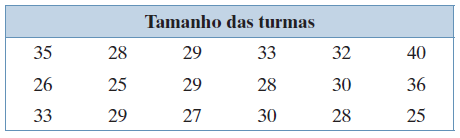

Considerando o nível de significância de $\alpha = 0,05$, você pode concordar com a afirmação da universidade?

In [30]:
import pandas as pd
# Dados relativos ao tamanho das turmas
turmas = pd.Series([35, 28, 29, 33, 32, 40, 26, 25, 29,
                    28, 30, 36, 33, 29, 27, 30, 28, 25])
# Hipóetes do teste
# H0: mu >= 32 alunos
# Ha: mu < 32 alunos (afirmação)
# Nível de significância
alpha = 0.05
# Teste de hipótese usando a função ttest_1samp
t0, p_valor = st.ttest_1samp(a=turmas, popmean=32, alternative='less')
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
# Teste de hipótese usando a função teste_z
print()
t0 = teste_t(est_amostral=turmas.mean(), n_amostras=len(turmas), alpha=alpha,
                  mu=32, s_amostral=turmas.std(), teste='esq')

Hipótese nula rejeitada ao nível de significância 5.0%

*** Teste de hipótese para a média (sigma desconhecido) ***
Teste unilateral à esquerda com t0 = -1.739607
Hipótese nula rejeitada ao nível de significância 5.0%
